In [1]:
import sys
import pandas as pd
sys.path.insert(0, './Moduulit')
pd.options.mode.chained_assignment = None

# Importtaus tässä muodossa
from database_connection import database_query
from outliers import find_outliers, draw_histogram
from clean_dataframe import clean_dataframe
from write_df_to_database import write_df_to_mariadb
from xy_diskretisointi import xy_to_grid
from isolation_forest import *
# tai from ... import *

# Database query

In [2]:
df = database_query("SELECT * FROM SensorData")
df.head(5)

,node_id,timestamp,x,y,z,q
0,b'-2393099149039893833',b'2020-06-24 12:20:08.533016+00:00',2762,-257,100,0
1,b'-2393099149039893833',b'2020-06-24 12:20:08.620015+00:00',2870,-344,100,0
2,b'-2393099149039893833',b'2020-06-24 12:20:09.622827+00:00',2916,-344,100,0
3,b'-2393099149039893833',b'2020-06-24 12:20:09.622846+00:00',2894,-254,100,0
4,b'-2393099149039893833',b'2020-06-24 12:20:10.116102+00:00',2888,-188,100,0


# Histogram of x and y coordinates

x mean:  1721.8087923854644
y mean:  680.035106133466
x std:  1031.8899924277641
y std:  1088.7371382819924


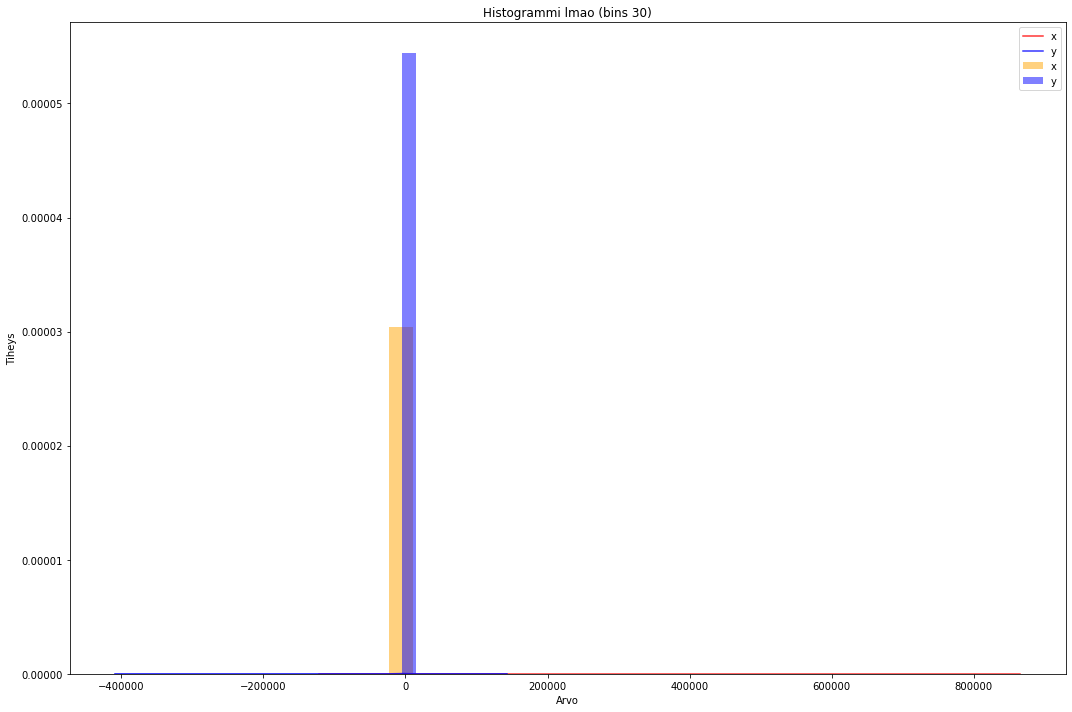

In [3]:
draw_histogram(df['x'], df['y'], 30)

# Find outliers using z_score

Number of missing variables in table
 node_id      0
timestamp    0
x            0
y            0
z            0
q            0
dtype: int64
------------------------------
Unique values in columns

uniques in x 10532
uniques in y 7899
uniques in z 3
uniques in q 1
------------------------------
Checking z and q columns

uniques in z [100 400   0]
uniques in q [0]
------------------------------
Number of nodes: 32
------------------------------
Outliers

Data with outliers:  13890906
Ouliers removed:     376791
Data after:  13514115


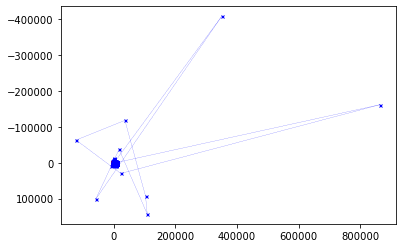

In [4]:
df1 = find_outliers(df)

# Cleaning Node_id, timestamp, q, z columns

In [5]:
df1 = clean_dataframe(df1)
df1.head(5)

,index,node_id,timestamp,x,y
0,0,1,2020-06-24 15:20:08.533,2762,-257
1,1,1,2020-06-24 15:20:08.620,2870,-344
2,2,1,2020-06-24 15:20:09.623,2916,-344
3,3,1,2020-06-24 15:20:09.623,2894,-254
4,4,1,2020-06-24 15:20:10.116,2888,-188


# Tehdään uuten tiedostoon Isolation Forestilla putsatut nodet

In [7]:
for i in range(32):
    df1 = isolation_forest(df1, 0, .003, i+1)
    print('node numero', i+1, 'valmis')
    df1_node.to_csv('./data/temp_data.csv',mode='a', header=False, index=False) # 0.03 contamination good

Dataframe lenght before: 11611074
Dataframe lenght after: 11609437
Total outliers detected: 1637
node numero 2 valmis
Dataframe lenght before: 11609437
Dataframe lenght after: 11608708
Total outliers detected: 729
node numero 3 valmis
Dataframe lenght before: 11608708
Dataframe lenght after: 11607719
Total outliers detected: 989
node numero 4 valmis
Dataframe lenght before: 11607719
Dataframe lenght after: 11605682
Total outliers detected: 2037
node numero 5 valmis
Dataframe lenght before: 11605682
Dataframe lenght after: 11604967
Total outliers detected: 715
node numero 6 valmis
Dataframe lenght before: 11604967
Dataframe lenght after: 11604228
Total outliers detected: 739
node numero 7 valmis
Dataframe lenght before: 11604228
Dataframe lenght after: 11602865
Total outliers detected: 1363
node numero 8 valmis
Dataframe lenght before: 11602865
Dataframe lenght after: 11602147
Total outliers detected: 718
node numero 9 valmis
Dataframe lenght before: 11602147
Dataframe lenght after: 116

In [ ]:
df1 = pd.read_csv('./data/temp_data.csv')
df1.head(5)

# Poistetaan vialliset / puutteelliset nodet

In [8]:
df1 = df1[df1.node_id != 13]
df1 = df1[df1.node_id != 14]
df1 = df1[df1.node_id != 18]
df1 = df1[df1.node_id != 32]

# Adding xy_grid values to dataframe (50x50)

In [1]:
df1 = xy_to_grid(df1, df1.x, df1.y, 50)
df1.head()

# Cleaning radical velocities

In [ ]:
start=datetime.now()

# Otetaan talteen alkuperäinen data vertailua varten
dftest = df1.copy()
table_alkuperäinen = len(df1['x'])

velocity.column_vel(df1, 'x')
velocity.column_vel(df1, 'y')
velocity.draw_vel(dftest, df1, 'x', 'y')

print("Aika: ",datetime.now()-start)
print(len(df1['x']))
print("Poistettuja pisteitä: ", table_alkuperäinen - len(df1['x']))

# Write cleaned and diskretized dataframe to mariadb database

In [17]:
write_df_to_mariadb(df1)

# Find and draw exits

In [19]:
sisään_xx, sisään_yy = sisään(df1)
ulos_xx, ulos_yy = ulos(df1)

draw_exits(df1, sisään_xx, sisään_yy, ulos_xx, ulos_yy)